In [32]:
# Third-party
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('notebook.mplstyle')
%matplotlib inline

# Astropy
import astropy.coordinates as coord
import astropy.units as u

Support for transforming velocities and proper motions was added to Astropy in v2.0 (released 2017-07-08), so you may need to update your version of Astropy to get the new features. If you use Anaconda (`conda`) for your Python installation, you can just do:

```
conda update astropy
```

If you use `pip`, you can do:

```
pip install --upgrade astropy
```

If you don't use either, come talk to me...

### Links

Here are two relevant pages in the Astropy documentation:

* [Transform from Heliocentric, spherical velocities (proper motion, etc.) to Galactocentric Cartesian velocities](
http://docs.astropy.org/en/latest/generated/examples/coordinates/plot_galactocentric-frame.html#sphx-glr-generated-examples-coordinates-plot-galactocentric-frame-py)
* [Working with velocities in astropy.coordinates](http://docs.astropy.org/en/latest/coordinates/velocities.html)

## Astropy coordinates terminology

* "Frame": This is the reference frame of your data. For example, ICRS (RA, Dec), Galactic (l, b), etc. All of the typical astronomical reference frames are implemented as classes in `astropy.coordinates`. For example, ICRS is just `ICRS`, etc. See the [transform graph](http://docs.astropy.org/en/latest/coordinates/index.html#module-astropy.coordinates) for a visualization of all of the frames and the transformations that are defined. The coordinate component names for each frame change depending on the type of frame. So, for `ICRS`->(ra,dec), for `Galactic`->(l,b). You can transform between these frames using the `.transform_to()` method:

In [33]:
icrs = coord.ICRS(ra=150 * u.degree, dec=-11*u.degree)

In [34]:
icrs.transform_to(coord.Galactic)

<Galactic Coordinate: (l, b) in deg
    ( 249.644697,  33.59995029)>

All of the values can be arrays or singular values:

In [35]:
icrs = coord.ICRS(ra=np.arange(10) * u.degree, dec=np.arange(10) * u.degree)
icrs

<ICRS Coordinate: (ra, dec) in deg
    [( 0.,  0.), ( 1.,  1.), ( 2.,  2.), ( 3.,  3.), ( 4.,  4.),
     ( 5.,  5.), ( 6.,  6.), ( 7.,  7.), ( 8.,  8.), ( 9.,  9.)]>

* "Representation": e.g., Cartesian, spherical, cylindrical. This is just a transformation of the data without a change of reference frame. Each frame has a default representation (e.g., for ICRS, Galactic, it's spherical) but that can be changed.

In [44]:
icrs = coord.ICRS(ra=150 * u.degree, dec=-11 * u.degree, distance=10*u.pc)
icrs.representation

astropy.coordinates.representation.SphericalRepresentation

In [45]:
icrs.set_representation_cls(coord.CylindricalRepresentation)

In [46]:
icrs.representation

astropy.coordinates.representation.CylindricalRepresentation

In [47]:
icrs.rho, icrs.phi, icrs.z

(<Quantity 9.81627183447664 pc>,
 <Angle 150.0 deg>,
 <Quantity -1.908089953765448 pc>)

* "Differential": Any derivative of the representation. This is how the velocities are currently stored internally, as time derivatives of the representation object. You don't really need to know about the low-level API, but you may see the word "differential" in example code.

Specifying values to the frame classes makes use of the [`astropy.units`](http://docs.astropy.org/en/latest/units/index.html). The primary object in the units subpackage is the [`Quantity`](http://docs.astropy.org/en/latest/units/quantity.html), which are representations of "number" or "array" data with units. They are typically created by multiplying a unit object with an array or number. For example:

In [41]:
15 * u.km

<Quantity 15.0 km>

In [42]:
angle = np.arange(360) * u.degree
np.cos(angle)

<Quantity [  1.00000000e+00,  9.99847695e-01,  9.99390827e-01,
             9.98629535e-01,  9.97564050e-01,  9.96194698e-01,
             9.94521895e-01,  9.92546152e-01,  9.90268069e-01,
             9.87688341e-01,  9.84807753e-01,  9.81627183e-01,
             9.78147601e-01,  9.74370065e-01,  9.70295726e-01,
             9.65925826e-01,  9.61261696e-01,  9.56304756e-01,
             9.51056516e-01,  9.45518576e-01,  9.39692621e-01,
             9.33580426e-01,  9.27183855e-01,  9.20504853e-01,
             9.13545458e-01,  9.06307787e-01,  8.98794046e-01,
             8.91006524e-01,  8.82947593e-01,  8.74619707e-01,
             8.66025404e-01,  8.57167301e-01,  8.48048096e-01,
             8.38670568e-01,  8.29037573e-01,  8.19152044e-01,
             8.09016994e-01,  7.98635510e-01,  7.88010754e-01,
             7.77145961e-01,  7.66044443e-01,  7.54709580e-01,
             7.43144825e-01,  7.31353702e-01,  7.19339800e-01,
             7.07106781e-01,  6.94658370e-01,  6.819983

In [43]:
angle.unit, angle.value

(Unit("deg"),
 array([   0.,    1.,    2.,    3.,    4.,    5.,    6.,    7.,    8.,
           9.,   10.,   11.,   12.,   13.,   14.,   15.,   16.,   17.,
          18.,   19.,   20.,   21.,   22.,   23.,   24.,   25.,   26.,
          27.,   28.,   29.,   30.,   31.,   32.,   33.,   34.,   35.,
          36.,   37.,   38.,   39.,   40.,   41.,   42.,   43.,   44.,
          45.,   46.,   47.,   48.,   49.,   50.,   51.,   52.,   53.,
          54.,   55.,   56.,   57.,   58.,   59.,   60.,   61.,   62.,
          63.,   64.,   65.,   66.,   67.,   68.,   69.,   70.,   71.,
          72.,   73.,   74.,   75.,   76.,   77.,   78.,   79.,   80.,
          81.,   82.,   83.,   84.,   85.,   86.,   87.,   88.,   89.,
          90.,   91.,   92.,   93.,   94.,   95.,   96.,   97.,   98.,
          99.,  100.,  101.,  102.,  103.,  104.,  105.,  106.,  107.,
         108.,  109.,  110.,  111.,  112.,  113.,  114.,  115.,  116.,
         117.,  118.,  119.,  120.,  121.,  122.,  123.,  124.,

In [48]:
dist = np.arange(10) * u.kpc
dist

<Quantity [ 0., 1., 2., 3., 4., 5., 6., 7., 8., 9.] kpc>

Arithmetic with these objects preserves the units and carries them along:

In [49]:
dist / (15*u.Myr)

<Quantity [ 0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
            0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ] kpc / Myr>

And the units can be re-represented using the `.to()` method:

In [50]:
v = dist / (15*u.Myr)
v.to(u.km/u.s)

<Quantity [   0.        ,  65.18614811, 130.37229622, 195.55844433,
            260.74459245, 325.93074056, 391.11688867, 456.30303678,
            521.48918489, 586.675333  ] km / s>

In [52]:
(1*u.Msun).to(u.kg).value

1.9884754153381438e+30

In [57]:
repr(M_sun)

"<<class 'astropy.constants.iau2015.IAU2015'> name='Solar mass' value=1.9884754153381438e+30 uncertainty=9.236140093538353e+25 unit='kg' reference='IAU 2015 Resolution B 3 + CODATA 2014'>"

In [58]:
repr(au)

"<<class 'astropy.constants.iau2015.IAU2015'> name='Astronomical Unit' value=149597870700.0 uncertainty=0.0 unit='m' reference='IAU 2012 Resolution B2'>"

----

### Passing velocity components to the coordinate frames

With the default (spherical) representations for most frames, the velocity components are specified as `pm_XX_cosYY`, `pm_YY`, and `radial_velocity`. For example, for the ICRS frame (which is Barycentric):

In [62]:
coord.ICRS(ra=8.67*u.hourangle, dec=53.09*u.deg,
           pm_ra_cosdec=21*u.mas/u.yr, 
           pm_dec=117*u.mas/u.yr)

<ICRS Coordinate: (ra, dec) in deg
    ( 130.05,  53.09)
 (pm_ra_cosdec, pm_dec) in mas / yr
    ( 21.,  117.)>

In [63]:
coord.ICRS(ra=8.67*u.hourangle, dec=53.09*u.deg,
           pm_ra=21*u.mas/u.yr, 
           pm_dec=117*u.mas/u.yr,
           differential_cls=coord.SphericalDifferential)

<ICRS Coordinate: (ra, dec) in deg
    ( 130.05,  53.09)
 (pm_ra, pm_dec) in mas / yr
    ( 21.,  117.)>

In [64]:
coord.ICRS(ra=8.67*u.hourangle, dec=53.09*u.deg,
           pm_ra_cosdec=21*u.mas/u.yr, 
           pm_dec=117*u.mas/u.yr,
           radial_velocity=71*u.km/u.s)

<ICRS Coordinate: (ra, dec) in deg
    ( 130.05,  53.09)
 (pm_ra_cosdec, pm_dec, radial_velocity) in (mas / yr, mas / yr, km / s)
    ( 21.,  117.,  71.)>

Only some frame transformations are supported when incomplete position or velocity data are passed. For example, with only sky position and proper motions, we can only transform to other frames that include a spherical rotation:

In [65]:
icrs = coord.ICRS(ra=8.67*u.hourangle, dec=53.09*u.deg,
                  pm_ra_cosdec=21*u.mas/u.yr, 
                  pm_dec=117*u.mas/u.yr)

icrs.transform_to(coord.Galactic)

<Galactic Coordinate: (l, b) in deg
    ( 165.26050548,  37.5050663)
 (pm_l_cosb, pm_b) in mas / yr
    (-118.11358595,  13.3858438)>

Without a distance or a radial velocity, transforming to any frame that requires a position or velocity offset will fail. For example, with the above, we can't transform to a `Galactocentric` frame:

In [67]:
icrs = coord.ICRS(ra=8.67*u.hourangle, dec=53.09*u.deg,
                  pm_ra_cosdec=21*u.mas/u.yr, 
                  pm_dec=117*u.mas/u.yr)
icrs.transform_to(coord.Galactocentric)

ERROR: ConvertError: Transforming to/from a Galactocentric frame requires a 3D coordinate, e.g. (angle, angle, distance) or (x, y, z). [astropy.coordinates.builtin_frames.galactocentric]


ConvertError: Transforming to/from a Galactocentric frame requires a 3D coordinate, e.g. (angle, angle, distance) or (x, y, z).

But if we specify these other components:

In [69]:
coord.Angle('12h 03m 17.2s')

<Angle 12.054777777777778 hourangle>

In [74]:
coord.Angle('+12d 03m 17.2s')

<Angle 12.054777777777778 deg>

In [75]:
icrs = coord.ICRS(ra=coord.Angle('12h 03m 17.2s'), dec=53.09*u.deg,
                  distance=150*u.pc,
                  pm_ra_cosdec=21*u.mas/u.yr, 
                  pm_dec=117*u.mas/u.yr,
                  radial_velocity=21*u.km/u.s)
gc = icrs.transform_to(coord.Galactocentric)

In [76]:
icrs = coord.ICRS(ra=8.67*u.hourangle, dec=53.09*u.deg,
                  distance=150*u.pc,
                  pm_ra_cosdec=21*u.mas/u.yr, 
                  pm_dec=117*u.mas/u.yr,
                  radial_velocity=21*u.km/u.s)
gc = icrs.transform_to(coord.Galactocentric)
gc

<Galactocentric Coordinate (galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    ( 266.4051, -28.936175)>, galcen_distance=8.3 kpc, galcen_v_sun=( 11.1,  232.24,  7.25) km / s, z_sun=27.0 pc, roll=0.0 deg): (x, y, z) in pc
    (-8414.73761104,  30.27521311,  118.6984873)
 (v_x, v_y, v_z) in km / s
    ( 22.02778588,  316.22739384,  27.55100774)>

The default Galactocentric frame has the parameters:

In [77]:
print(gc.galcen_distance, gc.galcen_v_sun, gc.z_sun)

8.3 kpc ( 11.1,  232.24,  7.25) km / s 27.0 pc


The default representation for the Galactocentric frame is Cartesian, but we can change to, e.g., cylindrical:

In [78]:
gc

<Galactocentric Coordinate (galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    ( 266.4051, -28.936175)>, galcen_distance=8.3 kpc, galcen_v_sun=( 11.1,  232.24,  7.25) km / s, z_sun=27.0 pc, roll=0.0 deg): (x, y, z) in pc
    (-8414.73761104,  30.27521311,  118.6984873)
 (v_x, v_y, v_z) in km / s
    ( 22.02778588,  316.22739384,  27.55100774)>

In [79]:
gc.v_x

<Quantity 22.02778587653991 km / s>

In [80]:
gc.set_representation_cls('cylindrical')

In [81]:
gc.rho, gc.z

(<Quantity 8414.79207414941 pc>, <Quantity 118.69848729718139 pc>)

In [85]:
gc.d_rho.to(u.km/u.s), gc.d_phi.to(u.mas/u.yr), gc.d_z.to(u.km/u.s)

(<Quantity -20.889902568623686 km / s>,
 <Quantity -7.929406338239896 mas / yr>,
 <Quantity 27.55100774399675 km / s>)

All of this works with arrays as well. As an example, let's create a circular ring of particles at 15 kpc in the Galactocentric frame with the circular velocity of the disk, and transform to observable coordinates:

In [86]:
gc_frame = coord.Galactocentric(galcen_distance=8*u.kpc)

In [87]:
icrs.transform_to(gc_frame)

<Galactocentric Coordinate (galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    ( 266.4051, -28.936175)>, galcen_distance=8.0 kpc, galcen_v_sun=( 11.1,  232.24,  7.25) km / s, z_sun=27.0 pc, roll=0.0 deg): (x, y, z) in pc
    (-8114.72477716,  30.27521311,  118.71248866)
 (v_x, v_y, v_z) in km / s
    ( 22.03026229,  316.22739384,  27.54967453)>

In [88]:
circ_velocity = 220 * u.km/u.s
dist = 15 * u.kpc

phi_grid = np.random.uniform(0, 360, 512) * u.degree # grid of azimuths
ring_rep = coord.CylindricalRepresentation(rho=dist, phi=phi_grid, z=0*u.pc)

angular_velocity = -circ_velocity*np.ones(len(phi_grid)) / dist

ring_dif = coord.CylindricalDifferential(
    d_rho=0*u.km/u.s,
    d_phi=angular_velocity.to(u.mas/u.yr, u.dimensionless_angles()),
    d_z=0*u.km/u.s
)

ring_rep = ring_rep.with_differentials(ring_dif)
gc_ring = coord.Galactocentric(ring_rep)

In [89]:
icrs_ring = gc_ring.transform_to(coord.ICRS)

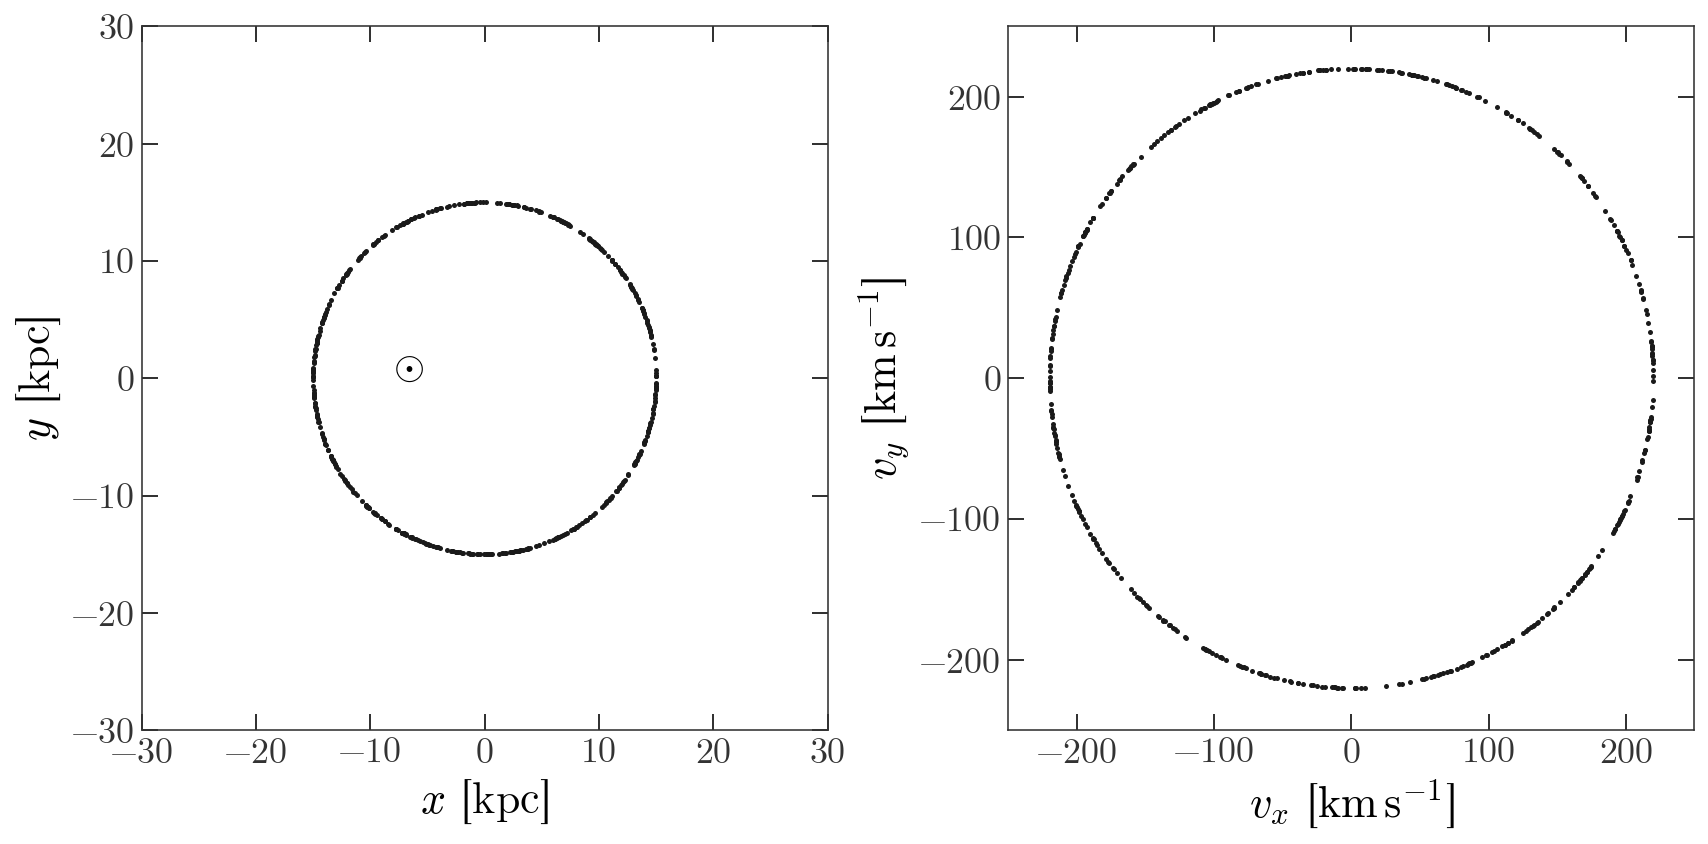

In [90]:
fig,axes = plt.subplots(1, 2, figsize=(12,6))

# Positions
axes[0].plot(gc_ring.x, gc_ring.y, marker='.', linestyle='none')
axes[0].text(-8., 0, r'$\odot$', fontsize=20)

axes[0].set_xlim(-30, 30)
axes[0].set_ylim(-30, 30)

axes[0].set_xlabel('$x$ [kpc]')
axes[0].set_ylabel('$y$ [kpc]')

# Velocities
axes[1].plot(gc_ring.v_x, gc_ring.v_y, marker='.', linestyle='none')

axes[1].set_xlim(-250, 250)
axes[1].set_ylim(-250, 250)

axes[1].set_xlabel('$v_x$ [{0}]'.format((u.km/u.s).to_string("latex_inline")))
axes[1].set_ylabel('$v_y$ [{0}]'.format((u.km/u.s).to_string("latex_inline")))

fig.tight_layout()

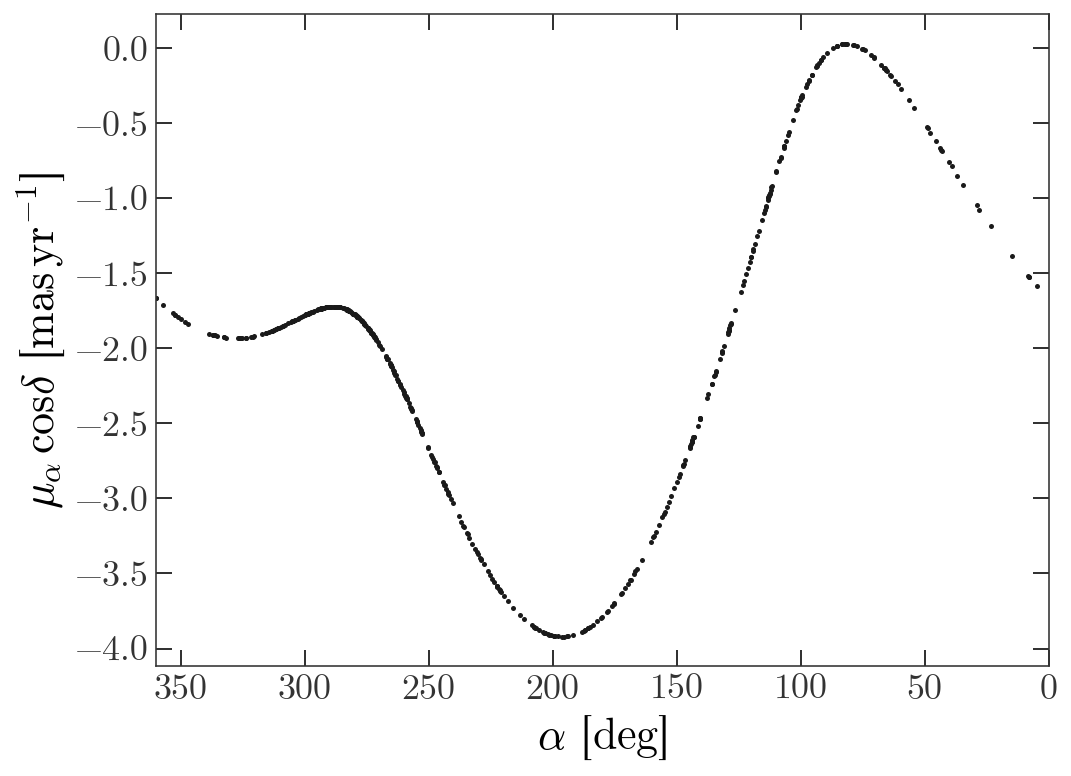

In [91]:
fig,ax = plt.subplots(1, 1, figsize=(8,6))

ax.plot(icrs_ring.ra.degree, icrs_ring.pm_ra_cosdec.value,
        marker='.', linestyle='none')

ax.set_xlim(360, 0)

ax.set_xlabel(r'$\alpha$ [deg]')
ax.set_ylabel(r'$\mu_\alpha \, \cos \delta$ [{0}]'.format((u.mas/u.yr).to_string('latex_inline')))

### Defining a custom coordinate frame - Stellar stream coordinates

As an example of how to define your own, custom coordinate frame, we'll define a Sagittarius stream coordinate frame. This system is roughly aligned with the stream so that the longitude component increases along the stream and the latitude is perpendicular to the stream. Though, this is only approximate because it is still a Barycentric frame. 
A more expository version of this tutorial is included [in the documentation](http://docs.astropy.org/en/latest/generated/examples/coordinates/plot_sgr-coordinate-frame.html#sphx-glr-generated-examples-coordinates-plot-sgr-coordinate-frame-py).

Most of the below code is either documentation or boilerplate code that you can copy and paste if you want to define your own. The key bits below are that the longitude and latitude components of the frame are typically defined as $\Lambda$ and $B$, so we'll call them `Lambda` and `Beta` in the below.

In [92]:
from astropy.coordinates import frame_transform_graph
from astropy.coordinates.matrix_utilities import rotation_matrix, matrix_product, matrix_transpose

In [93]:
class Sagittarius(coord.BaseCoordinateFrame):
    """
    A Heliocentric spherical coordinate system defined by the orbit
    of the Sagittarius dwarf galaxy, as described in
        http://adsabs.harvard.edu/abs/2003ApJ...599.1082M
    and further explained in
        http://www.stsci.edu/~dlaw/Sgr/.

    Parameters
    ----------
    representation : `BaseRepresentation` or None
        A representation object or None to have no data (or use the other keywords)

    Lambda : `Angle`, optional, must be keyword
        The longitude-like angle corresponding to Sagittarius' orbit.
    Beta : `Angle`, optional, must be keyword
        The latitude-like angle corresponding to Sagittarius' orbit.
    distance : `Quantity`, optional, must be keyword
        The Distance for this object along the line-of-sight.

    pm_Lambda_cosBeta : :class:`~astropy.units.Quantity`, optional, must be keyword
        The proper motion along the stream in ``Lambda`` (including the
        ``cos(Beta)`` factor) for this object (``pm_Beta`` must also be given).
    pm_Beta : :class:`~astropy.units.Quantity`, optional, must be keyword
        The proper motion in Declination for this object (``pm_ra_cosdec`` must
        also be given).
    radial_velocity : :class:`~astropy.units.Quantity`, optional, must be keyword
        The radial velocity of this object.

    """
    default_representation = coord.SphericalRepresentation
    default_differential = coord.SphericalCosLatDifferential

    frame_specific_representation_info = {
        coord.SphericalRepresentation: [
            coord.RepresentationMapping('lon', 'Lambda'),
            coord.RepresentationMapping('lat', 'Beta'),
            coord.RepresentationMapping('distance', 'distance')],
        coord.SphericalCosLatDifferential: [
            coord.RepresentationMapping('d_lon_coslat', 'pm_Lambda_cosBeta'),
            coord.RepresentationMapping('d_lat', 'pm_Beta'),
            coord.RepresentationMapping('d_distance', 'radial_velocity')],
        coord.SphericalDifferential: [
            coord.RepresentationMapping('d_lon', 'pm_Lambda'),
            coord.RepresentationMapping('d_lat', 'pm_Beta'),
            coord.RepresentationMapping('d_distance', 'radial_velocity')]
    }

    frame_specific_representation_info[coord.UnitSphericalRepresentation] = \
        frame_specific_representation_info[coord.SphericalRepresentation]
    frame_specific_representation_info[coord.UnitSphericalCosLatDifferential] = \
        frame_specific_representation_info[coord.SphericalCosLatDifferential]
    frame_specific_representation_info[coord.UnitSphericalDifferential] = \
        frame_specific_representation_info[coord.SphericalDifferential]

In [94]:
Sagittarius(Lambda=15*u.deg, Beta=-11*u.deg)

<Sagittarius Coordinate: (Lambda, Beta) in deg
    ( 15., -11.)>

In [95]:
# Euler angles for the transformation from Law & Majewski 2010
SGR_PHI = (180 + 3.75) * u.degree 
SGR_THETA = (90 - 13.46) * u.degree
SGR_PSI = (180 + 14.111534) * u.degree

# Generate the rotation matrix using the x-convention (see Goldstein)
D = rotation_matrix(SGR_PHI, "z")
C = rotation_matrix(SGR_THETA, "x")
B = rotation_matrix(SGR_PSI, "z")
A = np.diag([1.,1.,-1.])
SGR_MATRIX = matrix_product(A, B, C, D)

In [96]:
@frame_transform_graph.transform(coord.StaticMatrixTransform, coord.Galactic, Sagittarius)
def galactic_to_sgr():
    """ Compute the transformation matrix from Galactic spherical to
        heliocentric Sgr coordinates.
    """
    return SGR_MATRIX

@frame_transform_graph.transform(coord.StaticMatrixTransform, Sagittarius, coord.Galactic)
def sgr_to_galactic():
    """ Compute the transformation matrix from heliocentric Sgr coordinates to
        spherical Galactic.
    """
    return matrix_transpose(SGR_MATRIX)

In [97]:
icrs = coord.ICRS(ra=8.67*u.hourangle, dec=53.09*u.deg,
                  pm_ra_cosdec=21*u.mas/u.yr, 
                  pm_dec=117*u.mas/u.yr)

icrs.transform_to(Sagittarius)

<Sagittarius Coordinate: (Lambda, Beta) in deg
    ( 201.23182338, -22.7297518)
 (pm_Lambda_cosBeta, pm_Beta) in mas / yr
    ( 13.78560975, -118.06759489)>